In [2]:
import jupyter

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("Skyserver.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,6,94,430194949951088640,GALAXY,0.032125,382,51816,368
1,1237645879578460255,51.443695,1.270073,19.52808,17.96541,17.03493,16.53754,16.14154,94,301,6,512,466235292731336704,GALAXY,0.121315,414,51869,410
2,1237645879578460271,51.483584,1.272013,18.72268,17.38520,16.81134,16.51803,16.29502,94,301,6,512,466232818830174208,GALAXY,0.048765,414,51869,401
3,1237645941291614227,49.627485,-1.041769,17.65612,16.17133,15.58940,15.37850,15.26744,109,301,1,100,1705795582662043648,STAR,-0.000098,1515,52932,208
4,1237645941824356443,40.285690,-0.714957,17.54884,15.75164,15.03100,14.66728,14.36099,109,301,2,37,459394680333821952,GALAXY,0.040287,408,51821,100


In [4]:
df['class']

0     GALAXY
1     GALAXY
2     GALAXY
3       STAR
4     GALAXY
       ...  
95      STAR
96      STAR
97      STAR
98      STAR
99      STAR
Name: class, Length: 100, dtype: object

In [5]:
frame  = df[['u', 'i', 'r', 'g', 'z']]
X = frame
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
len(X_train)

80

In [9]:
knn.score(X_test, y_test)

0.8

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 1,  3],
       [ 1, 15]])

Text(42.0, 0.5, 'Truth')

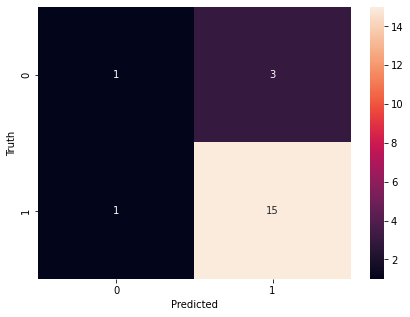

In [11]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.50      0.25      0.33         4
        STAR       0.83      0.94      0.88        16

    accuracy                           0.80        20
   macro avg       0.67      0.59      0.61        20
weighted avg       0.77      0.80      0.77        20

